In [1]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

# tej_key
tej_key = 'jghNMtKQaDfb50Jck2NwCbboFMtzoW'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key 
os.environ['TEJAPI_BASE'] = api_base

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2021-01-04', 
                    end = '2021-01-04',  # 選取 2021 年年初已上市的股票
                    mkt_bd_e = 'TSE',  # 填入：上市一般版股票
                    stktp_e = 'Common Stock',  # 填入：普通股股票 
                    main_ind_e = 'General Industry') # general industry 篩掉金融產業
pool

Currently used TEJ API key call quota 581/1000 (58.1%)
Currently used TEJ API key data quota 7251209/10000000 (72.51%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [3]:
len(pool)

836

In [4]:
import TejToolAPI

start_time = pd.Timestamp('2021-01-05')
end_time = pd.Timestamp('2022-12-30')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,  # 填入：正確參數名稱 & 股票池列表 ( list )
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文', '常續ROE', '營業毛利率', '本益比','營運產生現金流量', '投資產生現金流量'],
                                   transfer_to_chinese = True)

data['自由現金流量'] = data['營運產生現金流量_A'] + data['投資產生現金流量_A']  # 計算自由現金流量 = 營運產生現金流量 + (-)投資產生現金流量
data.drop(columns = ['營運產生現金流量_A', '投資產生現金流量_A'], inplace = True)  # 移除欄位

data

Currently used TEJ API key call quota 668/1000 (66.8%)
Currently used TEJ API key data quota 8555825/10000000 (85.56%)


,股票代碼,日期,主產業別_中文,本益比,常續ROE_A,營業毛利率_A,自由現金流量
0,1101,2021-01-05,M1100 水泥工業,10.26,NaN,NaN,NaN
1,1102,2021-01-05,M1100 水泥工業,10.07,NaN,NaN,NaN
2,1103,2021-01-05,M1100 水泥工業,35.85,NaN,NaN,NaN
3,1104,2021-01-05,M1100 水泥工業,11.65,NaN,NaN,NaN
4,1108,2021-01-05,M1100 水泥工業,13.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...
405795,9944,2022-12-30,M9900 其他,4.20,1.94,26.99,597193.0
405796,9945,2022-12-30,M9900 其他,5.69,22.26,22.23,-791032.0
405797,9946,2022-12-30,M2500 建材營造,23.46,1.51,16.70,554326.0
405798,9955,2022-12-30,M9900 其他,NaN,-5.44,0.01,-28051.0


In [5]:
# 取出最近年度(2022-12-30)的資料
data_last_1_2Y = data[data['日期'].isin(['2021-12-30', '2022-12-30'])].reset_index(drop = True)  

# 取出股票基本資料與 ROE 資料方便觀察
PE_1Y_data = data_last_1_2Y[['股票代碼', '日期', '主產業別_中文', '本益比']]

PE_1Y_data

,股票代碼,日期,主產業別_中文,本益比
0,1101,2021-12-30,M1100 水泥工業,14.08
1,1102,2021-12-30,M1100 水泥工業,10.16
2,1103,2021-12-30,M1100 水泥工業,7.31
3,1104,2021-12-30,M1100 水泥工業,12.78
4,1108,2021-12-30,M1100 水泥工業,20.52
...,...,...,...,...
1650,9944,2022-12-30,M9900 其他,4.20
1651,9945,2022-12-30,M9900 其他,5.69
1652,9946,2022-12-30,M2500 建材營造,23.46
1653,9955,2022-12-30,M9900 其他,NaN


In [6]:
PE_1Y_data['PE小於前年']=PE_1Y_data['本益比'] - PE_1Y_data.groupby('股票代碼')['本益比'].shift(1)
PE_1Y_data

,股票代碼,日期,主產業別_中文,本益比,PE小於前年
0,1101,2021-12-30,M1100 水泥工業,14.08,NaN
1,1102,2021-12-30,M1100 水泥工業,10.16,NaN
2,1103,2021-12-30,M1100 水泥工業,7.31,NaN
3,1104,2021-12-30,M1100 水泥工業,12.78,NaN
4,1108,2021-12-30,M1100 水泥工業,20.52,NaN
...,...,...,...,...,...
1650,9944,2022-12-30,M9900 其他,4.20,-68.68
1651,9945,2022-12-30,M9900 其他,5.69,-3.31
1652,9946,2022-12-30,M2500 建材營造,23.46,-12.49
1653,9955,2022-12-30,M9900 其他,NaN,NaN


In [7]:
set_1 = set(PE_1Y_data[PE_1Y_data['PE小於前年'] < 0]['股票代碼'])  # 篩選符合選股條件的公司
set_1

{'1102',
 '1104',
 '1108',
 '1203',
 '1219',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1307',
 '1308',
 '1310',
 '1313',
 '1315',
 '1316',
 '1319',
 '1339',
 '1342',
 '1409',
 '1413',
 '1414',
 '1417',
 '1419',
 '1434',
 '1436',
 '1438',
 '1439',
 '1443',
 '1444',
 '1447',
 '1449',
 '1451',
 '1453',
 '1454',
 '1457',
 '1463',
 '1464',
 '1467',
 '1468',
 '1471',
 '1475',
 '1476',
 '1477',
 '1503',
 '1514',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1526',
 '1527',
 '1530',
 '1531',
 '1532',
 '1535',
 '1536',
 '1537',
 '1539',
 '1540',
 '1541',
 '1560',
 '1568',
 '1582',
 '1583',
 '1587',
 '1597',
 '1603',
 '1605',
 '1609',
 '1611',
 '1612',
 '1616',
 '1618',
 '1707',
 '1708',
 '1709',
 '1711',
 '1712',
 '1713',
 '1717',
 '1722',
 '1723',
 '1725',
 '1727',
 '1730',
 '1733',
 '1734',
 '1736',
 '1762',
 '1773',
 '1783',
 '1786',
 '1789',
 '1809',
 '1817',
 '1903',
 '1906',
 '2008',
 '2012',
 '2013',
 '2015',
 '2025',
 '2027',
 '2028',
 '2030',
 '2034',
 

In [8]:
# 取出股票基本資料與 Gross Margin 資料方便觀察
data_last_1Y = data[data['日期'] == '2022-12-30'].reset_index(drop = True) 
cash_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '自由現金流量']]

cash_1Y_data

,股票代碼,日期,主產業別_中文,自由現金流量
0,1101,2022-12-30,M1100 水泥工業,-7925014.0
1,1102,2022-12-30,M1100 水泥工業,13823534.0
2,1103,2022-12-30,M1100 水泥工業,53554.0
3,1104,2022-12-30,M1100 水泥工業,583449.0
4,1108,2022-12-30,M1100 水泥工業,-246216.0
...,...,...,...,...
819,9944,2022-12-30,M9900 其他,597193.0
820,9945,2022-12-30,M9900 其他,-791032.0
821,9946,2022-12-30,M2500 建材營造,554326.0
822,9955,2022-12-30,M9900 其他,-28051.0


In [9]:
# 依不同產業分類，計算出產業平均 GM
# 填入：分類函數 & 欲進行分類的財務科目 & 欲計算平均的財務科目 
cash_data_ave = cash_1Y_data.groupby('主產業別_中文')['自由現金流量'].transform('mean')  

# 加入 '產業平均毛利率' 欄位
cash_1Y_data['產業自由現金流量'] = cash_data_ave

cash_1Y_data

,股票代碼,日期,主產業別_中文,自由現金流量,產業自由現金流量
0,1101,2022-12-30,M1100 水泥工業,-7925014.0,1.064371e+06
1,1102,2022-12-30,M1100 水泥工業,13823534.0,1.064371e+06
2,1103,2022-12-30,M1100 水泥工業,53554.0,1.064371e+06
3,1104,2022-12-30,M1100 水泥工業,583449.0,1.064371e+06
4,1108,2022-12-30,M1100 水泥工業,-246216.0,1.064371e+06
...,...,...,...,...,...
819,9944,2022-12-30,M9900 其他,597193.0,-2.150994e+05
820,9945,2022-12-30,M9900 其他,-791032.0,-2.150994e+05
821,9946,2022-12-30,M2500 建材營造,554326.0,-5.611645e+05
822,9955,2022-12-30,M9900 其他,-28051.0,-2.150994e+05


In [10]:
# 篩選符合選股條件的公司
# 填入：正確的篩選條件
set_2 = set(cash_1Y_data[cash_1Y_data['自由現金流量'] > cash_1Y_data['產業自由現金流量']]['股票代碼'])
set_2

{'1102',
 '1109',
 '1216',
 '1227',
 '1229',
 '1301',
 '1303',
 '1304',
 '1316',
 '1319',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1432',
 '1434',
 '1435',
 '1436',
 '1440',
 '1443',
 '1444',
 '1453',
 '1464',
 '1476',
 '1477',
 '1503',
 '1504',
 '1512',
 '1513',
 '1516',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1533',
 '1536',
 '1537',
 '1539',
 '1541',
 '1560',
 '1568',
 '1587',
 '1598',
 '1604',
 '1605',
 '1608',
 '1611',
 '1614',
 '1615',
 '1617',
 '1707',
 '1708',
 '1709',
 '1712',
 '1717',
 '1718',
 '1722',
 '1723',
 '1725',
 '1726',
 '1731',
 '1760',
 '1762',
 '1789',
 '1802',
 '1805',
 '1905',
 '1907',
 '2006',
 '2007',
 '2009',
 '2010',
 '2012',
 '2015',
 '2017',
 '2020',
 '2022',
 '2023',
 '2025',
 '2028',
 '2029',
 '2030',
 '2031',
 '2032',
 '2033',
 '2049',
 '2059',
 '2062',
 '2069',
 '2103',
 '2105',
 '2107',
 '2108',
 '2109',
 '2114',
 '2204',
 '2206',
 '2227',
 '2228',
 '2231',
 '2233',
 '2241',
 '2247',
 '2303',
 '2308',
 '2313',
 '2317',
 '2324',
 '2330',
 

In [11]:
# 取出近兩年(2022-12-30, 2021-12-30)的資料
data_last_2Y = data[data['日期'].isin(['2022-12-30', '2021-12-30'])].reset_index(drop = True)

# 計算公司兩年平均的 ROE
ROE_2Y_ave = data_last_2Y.groupby('股票代碼')['常續ROE_A'].mean()

# 從 Series 轉成 Dataframe，並重新命名欄位
ROE_2Y_ave = pd.DataFrame(ROE_2Y_ave).rename(columns = {'常續ROE_A': '2年平均ROE'})

ROE_2Y_ave

,2年平均ROE
股票代碼,
1101,3.290
1102,6.465
1103,-1.900
1104,4.050
1108,4.900
...,...
9944,1.635
9945,17.845
9946,1.915


In [12]:
set_3 = set(ROE_2Y_ave[ROE_2Y_ave['2年平均ROE'] > 17].index)  # 篩選符合選股條件的公司
set_3

{'1232',
 '1342',
 '1436',
 '1475',
 '1476',
 '1477',
 '1526',
 '1773',
 '2025',
 '2027',
 '2028',
 '2059',
 '2108',
 '2303',
 '2327',
 '2330',
 '2345',
 '2348',
 '2368',
 '2376',
 '2377',
 '2379',
 '2383',
 '2395',
 '2404',
 '2454',
 '2455',
 '2458',
 '2465',
 '2467',
 '2597',
 '2603',
 '2609',
 '2615',
 '2636',
 '2905',
 '2912',
 '2915',
 '3006',
 '3014',
 '3017',
 '3023',
 '3030',
 '3033',
 '3034',
 '3037',
 '3042',
 '3056',
 '3130',
 '3209',
 '3312',
 '3413',
 '3443',
 '3515',
 '3533',
 '3557',
 '3563',
 '3653',
 '4536',
 '4919',
 '4952',
 '4961',
 '5471',
 '5608',
 '6196',
 '6202',
 '6278',
 '6281',
 '6409',
 '6412',
 '6491',
 '6531',
 '6582',
 '6669',
 '6670',
 '6706',
 '6756',
 '8016',
 '8046',
 '8081',
 '8112',
 '8261',
 '8341',
 '8454',
 '8464',
 '8478',
 '9906',
 '9910',
 '9914',
 '9921',
 '9945'}

In [13]:
tickers = list(set_1 & set_2 & set_3 )
tickers

['1476',
 '2059',
 '1436',
 '2912',
 '1342',
 '8046',
 '3056',
 '2615',
 '9914',
 '2395',
 '2609',
 '2379',
 '2603',
 '2025',
 '2454',
 '2028',
 '4536',
 '2404',
 '3034',
 '8016',
 '6670',
 '3533',
 '2915',
 '2458',
 '8464',
 '1477',
 '6669',
 '8478',
 '9921',
 '6278',
 '3037',
 '8341',
 '2303',
 '2330',
 '9910',
 '4919',
 '3017',
 '9906',
 '2345',
 '2377',
 '8454',
 '3557']

In [14]:
len(tickers)

42

In [15]:
# 在每個股票代碼後添加 '.TW'
tickers_tw = [ticker + '.TW' for ticker in tickers]

In [16]:


# 設定時間範圍
start_date = '2021-01-04'
end_date = '2021-12-30'

# 下載股票數據
stock_data = yf.download(tickers_tw, start=start_date, end=end_date)['Adj Close']
# 計算股票收益率
returns = stock_data.pct_change().dropna()

# 獲取三因子數據
ff_factors_url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip'
ff_factors = pd.read_csv(ff_factors_url, compression='zip', skiprows=3)

# 過濾掉非數據行
ff_factors = ff_factors[ff_factors.iloc[:, 0].apply(lambda x: str(x).isdigit())]

# 設置正確列名
ff_factors.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']

# 轉換日期格式
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')

# 設置索引
ff_factors.set_index('Date', inplace=True)

# 過濾日期範圍
ff_factors = ff_factors.loc[start_date:end_date]

# 轉換為百分比
ff_factors = ff_factors / 100

# 合併數據
merged_data = returns.join(ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']], how='inner', lsuffix='_returns', rsuffix='_ff_factors')

# 計算超額收益
excess_returns = merged_data[tickers_tw].subtract(merged_data['RF'], axis=0)

# 創建空的字典儲存回歸模型
models = {}

# 回歸分析
for ticker in tickers_tw:
    Y = excess_returns[ticker]
    X = merged_data[['Mkt-RF', 'SMB', 'HML']]  # 使用正確列名
    X = sm.add_constant(X)  # 添加常數項
    model = sm.OLS(Y, X).fit()
    models[ticker] = model

[*********************100%%**********************]  42 of 42 completed


In [17]:
# 設定最近一週的日期範圍
current_start_date = '2022-08-01'
current_end_date = '2022-08-07'

# 下載最近一週的股票數據
stock_data = yf.download(tickers_tw, start=current_start_date, end=current_end_date)['Adj Close']

# 找到最近一個有數據的日期
last_available_date = stock_data.dropna().index[-1]
current_stock_data = stock_data.loc[last_available_date]

# 獲取前一個交易日的數據
previous_stock_data = stock_data.shift(1).loc[last_available_date]
current_returns = (current_stock_data - previous_stock_data) / previous_stock_data

[*********************100%%**********************]  42 of 42 completed


In [18]:
# 確保日期在ff_factors中存在
if last_available_date not in ff_factors.index:
    last_available_date = ff_factors.index[-1]  # 使用最近的三因子數據

# 過濾到最近可用的三因子數據
current_ff_factors = ff_factors.loc[last_available_date]

# 轉換為百分比
current_ff_factors = current_ff_factors / 100

# 計算當前的超額收益
current_excess_returns = current_returns.subtract(current_ff_factors['RF'])

In [19]:
# 創建一個 DataFrame 來存儲當前的三因子數據
current_factors = pd.DataFrame({
    'const': 1,
    'Mkt-RF': current_ff_factors['Mkt-RF'],
    'SMB': current_ff_factors['SMB'],
    'HML': current_ff_factors['HML']
}, index=[0])

# 使用模型來預測評分
predictions = {}
for ticker in tickers_tw:
    model = models[ticker]
    prediction = model.predict(current_factors)
    predictions[ticker] = prediction[0]

# 顯示預測結果
for ticker, score in predictions.items():
    print(f'{ticker} 評分: {score}')

1476.TW 評分: 0.0019190921525257686
2059.TW 評分: 0.00265141855846452
1436.TW 評分: 0.0017951818942380305
2912.TW 評分: -5.2419984868312596e-05
1342.TW 評分: 0.0006428732901548298
8046.TW 評分: 0.004108439350360345
3056.TW 評分: 0.00063629336753402
2615.TW 評分: 0.0074268222661006125
9914.TW 評分: 0.0012840924164469758
2395.TW 評分: 0.0003763572038517796
2609.TW 評分: 0.007465369822756987
2379.TW 評分: 0.0017227006978012152
2603.TW 評分: 0.006433527624125204
2025.TW 評分: 0.004475477269175689
2454.TW 評分: 0.0017759346761837395
2028.TW 評分: 0.0024978127178064053
4536.TW 評分: 8.962756253268473e-05
2404.TW 評分: -0.0004008793115058579
3034.TW 評分: 0.0021457782684386525
8016.TW 評分: 0.003663060003624343
6670.TW 評分: 0.0005038850313966098
3533.TW 評分: 0.001943144349909104
2915.TW 評分: 0.003039076257890382
2458.TW 評分: 0.00039052866993890834
8464.TW 評分: 0.0006059893479541307
1477.TW 評分: 0.0014946582637332415
6669.TW 評分: 0.0017985161969639918
8478.TW 評分: 0.004255955317650155
9921.TW 評分: 0.0008078855816814787
6278.TW 評分: 0.00010434

In [20]:
# 將預測結果進行排序
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# 取出前五個
top_five_predictions = sorted_predictions[:5]

# 打印前五個評分
for ticker, score in top_five_predictions:
    print(f"Top five scores: Ticker: {ticker}, Score: {score}")

Top five scores: Ticker: 2609.TW, Score: 0.007465369822756987
Top five scores: Ticker: 2615.TW, Score: 0.0074268222661006125
Top five scores: Ticker: 2603.TW, Score: 0.006433527624125204
Top five scores: Ticker: 8454.TW, Score: 0.005742765840041407
Top five scores: Ticker: 4919.TW, Score: 0.005517962096439457


In [21]:
# 提取前五名的股票代碼（去除 .TW 後）添加到列表中
tickers = []
for ticker, score in top_five_predictions:
    ticker_without_tw = ticker[:-3]  # 去除后缀 ".TW"
    tickers.append(ticker_without_tw)

# 打印前五名的股票代碼
print("前五名的股票代碼:", tickers)

前五名的股票代碼: ['2609', '2615', '2603', '8454', '4919']


In [22]:
start = '2022-08-01'
end = '2022-12-31'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant  
# 填入：將價量資料導入的程式碼

Merging daily equity files:
Currently used TEJ API key call quota 674/1000 (67.4%)
Currently used TEJ API key data quota 8678333/10000000 (86.78%)


[2024-06-13 07:40:02.605609] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-06-13 07:40:07.141549] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [23]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))  # 填入：本範例使用的滑價模型
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))  # 填入：本範例使用的手續費模型
    set_benchmark(symbol('IR0001'))

In [24]:
def handle_data(context, data):

    # 回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))  # 填入：正確的下單函數

    context.day += 1  # 以免重複買進

In [25]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

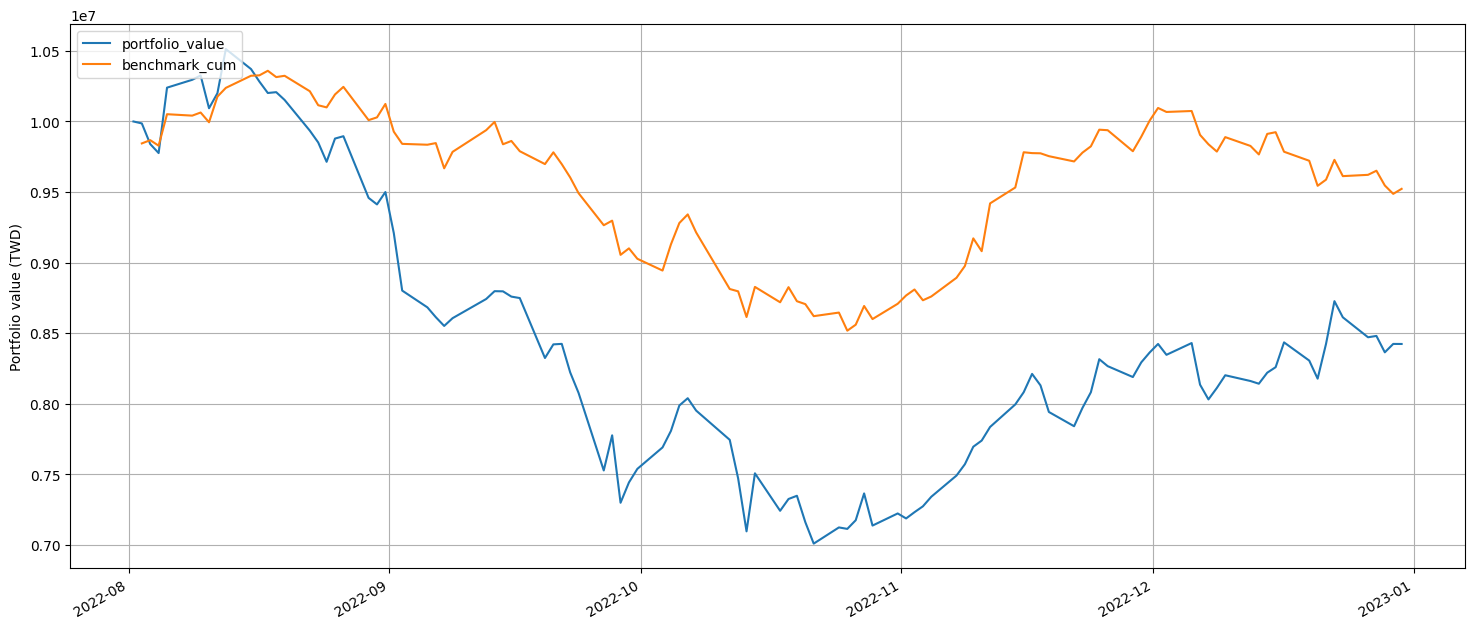

,period_open,period_close,ending_value,ending_exposure,returns,ending_cash,positions,benchmark_return,transactions,long_exposure,...,algo_volatility,sharpe,max_drawdown,max_leverage,trading_days,period_label,sortino,alpha,beta,benchmark_cum
2022-08-01 13:30:00+08:00,2022-08-01 09:01:00+08:00,2022-08-01 13:30:00+08:00,0.0,0.0,0.000000,1.000000e+07,[],NaN,[],0.0,...,NaN,NaN,0.000000,0.000000,1,2022-08,NaN,NaN,NaN,NaN
2022-08-02 13:30:00+08:00,2022-08-02 09:01:00+08:00,2022-08-02 13:30:00+08:00,9754463.9,9754463.9,-0.001391,2.316295e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",-0.015551,"[{'amount': 22222, 'dt': 2022-08-02 13:30:00+0...",9754463.9,...,0.015610,-11.224972,-0.001391,0.976805,2,2022-08,-11.224972,NaN,NaN,9.844494e+06
2022-08-03 13:30:00+08:00,2022-08-03 09:01:00+08:00,2022-08-03 13:30:00+08:00,9608279.6,9608279.6,-0.014639,2.316295e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",0.002337,[],9608279.6,...,0.128270,-10.497205,-0.016009,0.976805,3,2022-08,-9.990844,-0.962145,-0.740636,9.867499e+06
2022-08-04 13:30:00+08:00,2022-08-04 09:01:00+08:00,2022-08-04 13:30:00+08:00,9544501.5,9544501.5,-0.006482,2.316295e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",-0.003970,[],9544501.5,...,0.105121,-13.491083,-0.022387,0.976805,4,2022-08,-11.118717,-0.946235,-0.703408,9.828325e+06
2022-08-05 13:30:00+08:00,2022-08-05 09:01:00+08:00,2022-08-05 13:30:00+08:00,10008056.6,10008056.6,0.047417,2.316295e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",0.022711,[],10008056.6,...,0.387428,3.239987,-0.022387,0.977379,5,2022-08,11.002938,1.974598,1.368820,1.005153e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 13:30:00+08:00,2022-12-26 09:01:00+08:00,2022-12-26 13:30:00+08:00,8114740.1,8114740.1,-0.016423,3.559489e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",0.000953,[],8114740.1,...,0.342997,-1.000192,-0.333369,0.977968,104,2022-12,-1.274175,-0.228299,1.181036,9.621825e+06
2022-12-27 13:30:00+08:00,2022-12-27 09:01:00+08:00,2022-12-27 13:30:00+08:00,8124237.1,8124237.1,0.001121,3.559489e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",0.003031,[],8124237.1,...,0.341365,-0.987518,-0.333369,0.977968,105,2022-12,-1.258051,-0.230986,1.180752,9.650986e+06
2022-12-28 13:30:00+08:00,2022-12-28 09:01:00+08:00,2022-12-28 13:30:00+08:00,8008098.8,8008098.8,-0.013695,3.559489e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",-0.010840,[],8008098.8,...,0.340270,-1.077036,-0.333369,0.977968,106,2022-12,-1.369899,-0.230723,1.180661,9.546370e+06
2022-12-29 13:30:00+08:00,2022-12-29 09:01:00+08:00,2022-12-29 13:30:00+08:00,8067552.9,8067552.9,0.007108,3.559489e+05,"[{'sid': Equity(1 [2609]), 'amount': 22222, 'c...",-0.006214,[],8067552.9,...,0.338916,-1.021837,-0.333369,0.977968,107,2022-12,-1.300610,-0.202297,1.175302,9.487049e+06


In [26]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results  # 回測結果

In [27]:
results.columns

Index(['period_open', 'period_close', 'ending_value', 'ending_exposure',
       'returns', 'ending_cash', 'positions', 'benchmark_return',
       'transactions', 'long_exposure', 'treasury_return', 'capital_used',
       'long_value', 'pnl', 'orders', 'short_value', 'gross_leverage',
       'starting_value', 'short_exposure', 'net_leverage', 'starting_exposure',
       'longs_count', 'shorts_count', 'portfolio_value', 'starting_cash',
       'algorithm_period_return', 'benchmark_period_return', 'excess_return',
       'benchmark_volatility', 'treasury_period_return', 'algo_volatility',
       'sharpe', 'max_drawdown', 'max_leverage', 'trading_days',
       'period_label', 'sortino', 'alpha', 'beta', 'benchmark_cum'],
      dtype='object')

<Axes: >

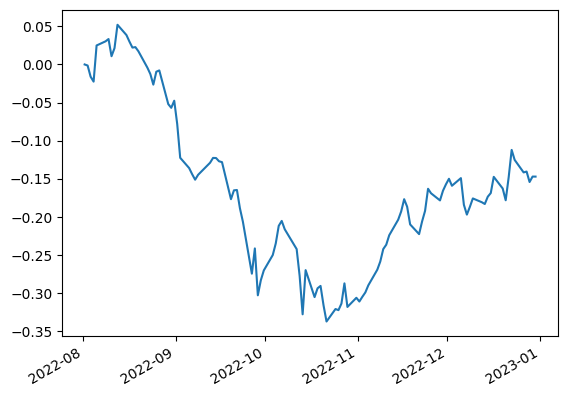

In [28]:
results.returns.cumsum().plot()  # 繪製累積回報圖

In [32]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

Start date,2022-08-01
End date,2022-12-30
Total months,5
,Backtest
Annual return,-32.994%
Cumulative returns,-15.768%
Annual volatility,33.733%
Sharpe ratio,-1.02
Calmar ratio,-0.99
Stability,0.33
Max drawdown,-33.337%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.34,2022-08-12,2022-10-21,NaT,NaN
1,2.25,2022-08-09,2022-08-10,2022-08-12,4
2,2.24,2022-08-01,2022-08-04,2022-08-05,5
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

Top 10 long positions of all time,max
sid,
4919,27.21%
2603,21.13%
8454,20.36%
2609,20.08%
2615,19.79%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
4919,27.21%
2603,21.13%
8454,20.36%
2609,20.08%
2615,19.79%


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


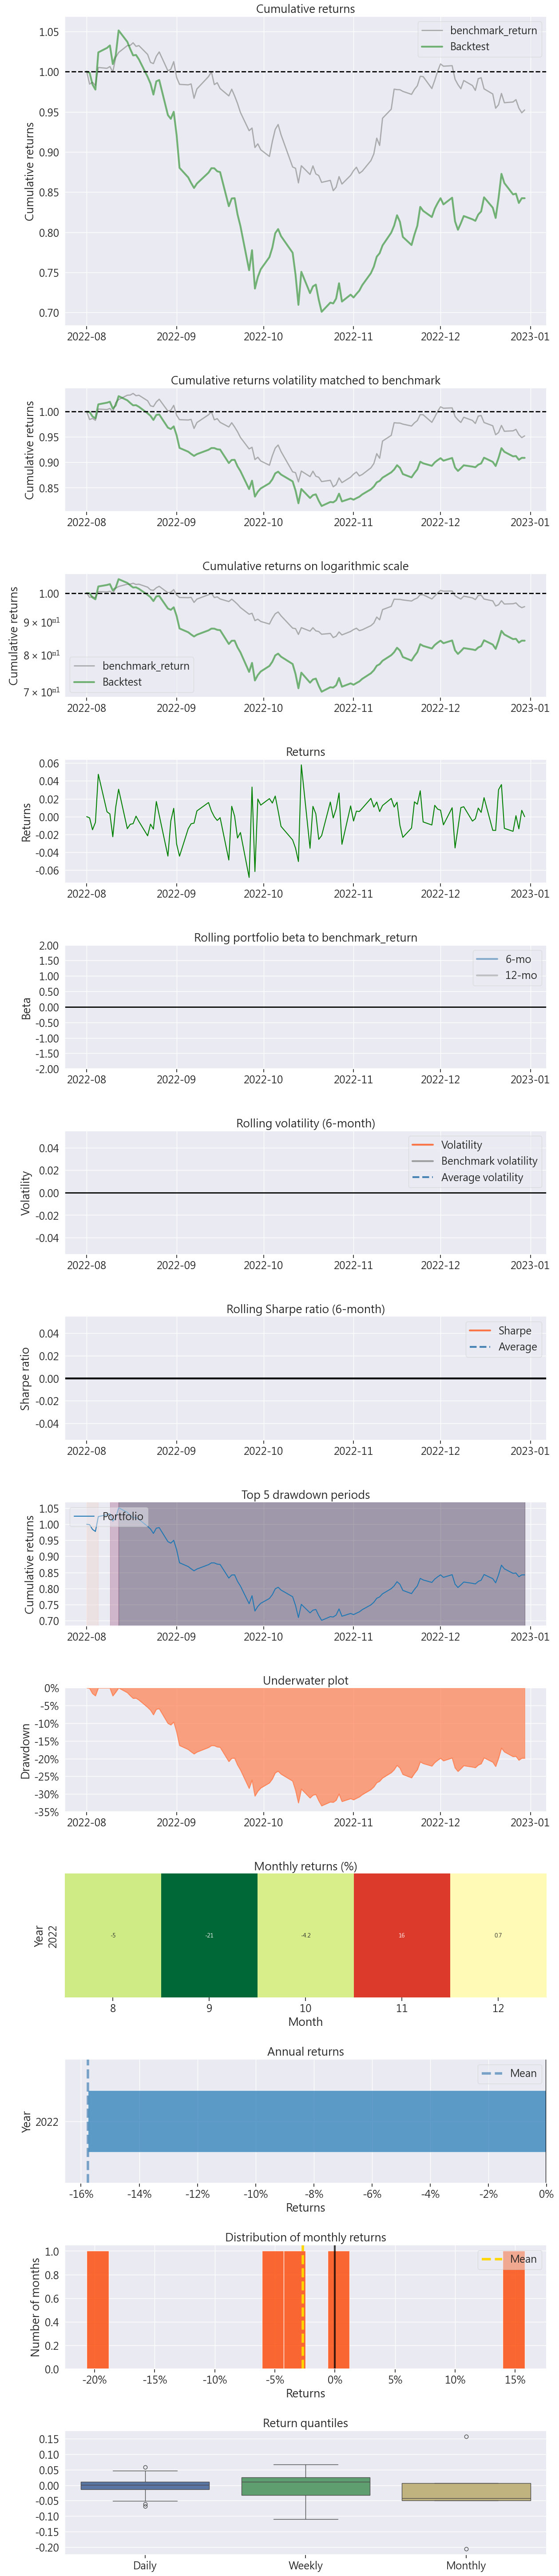

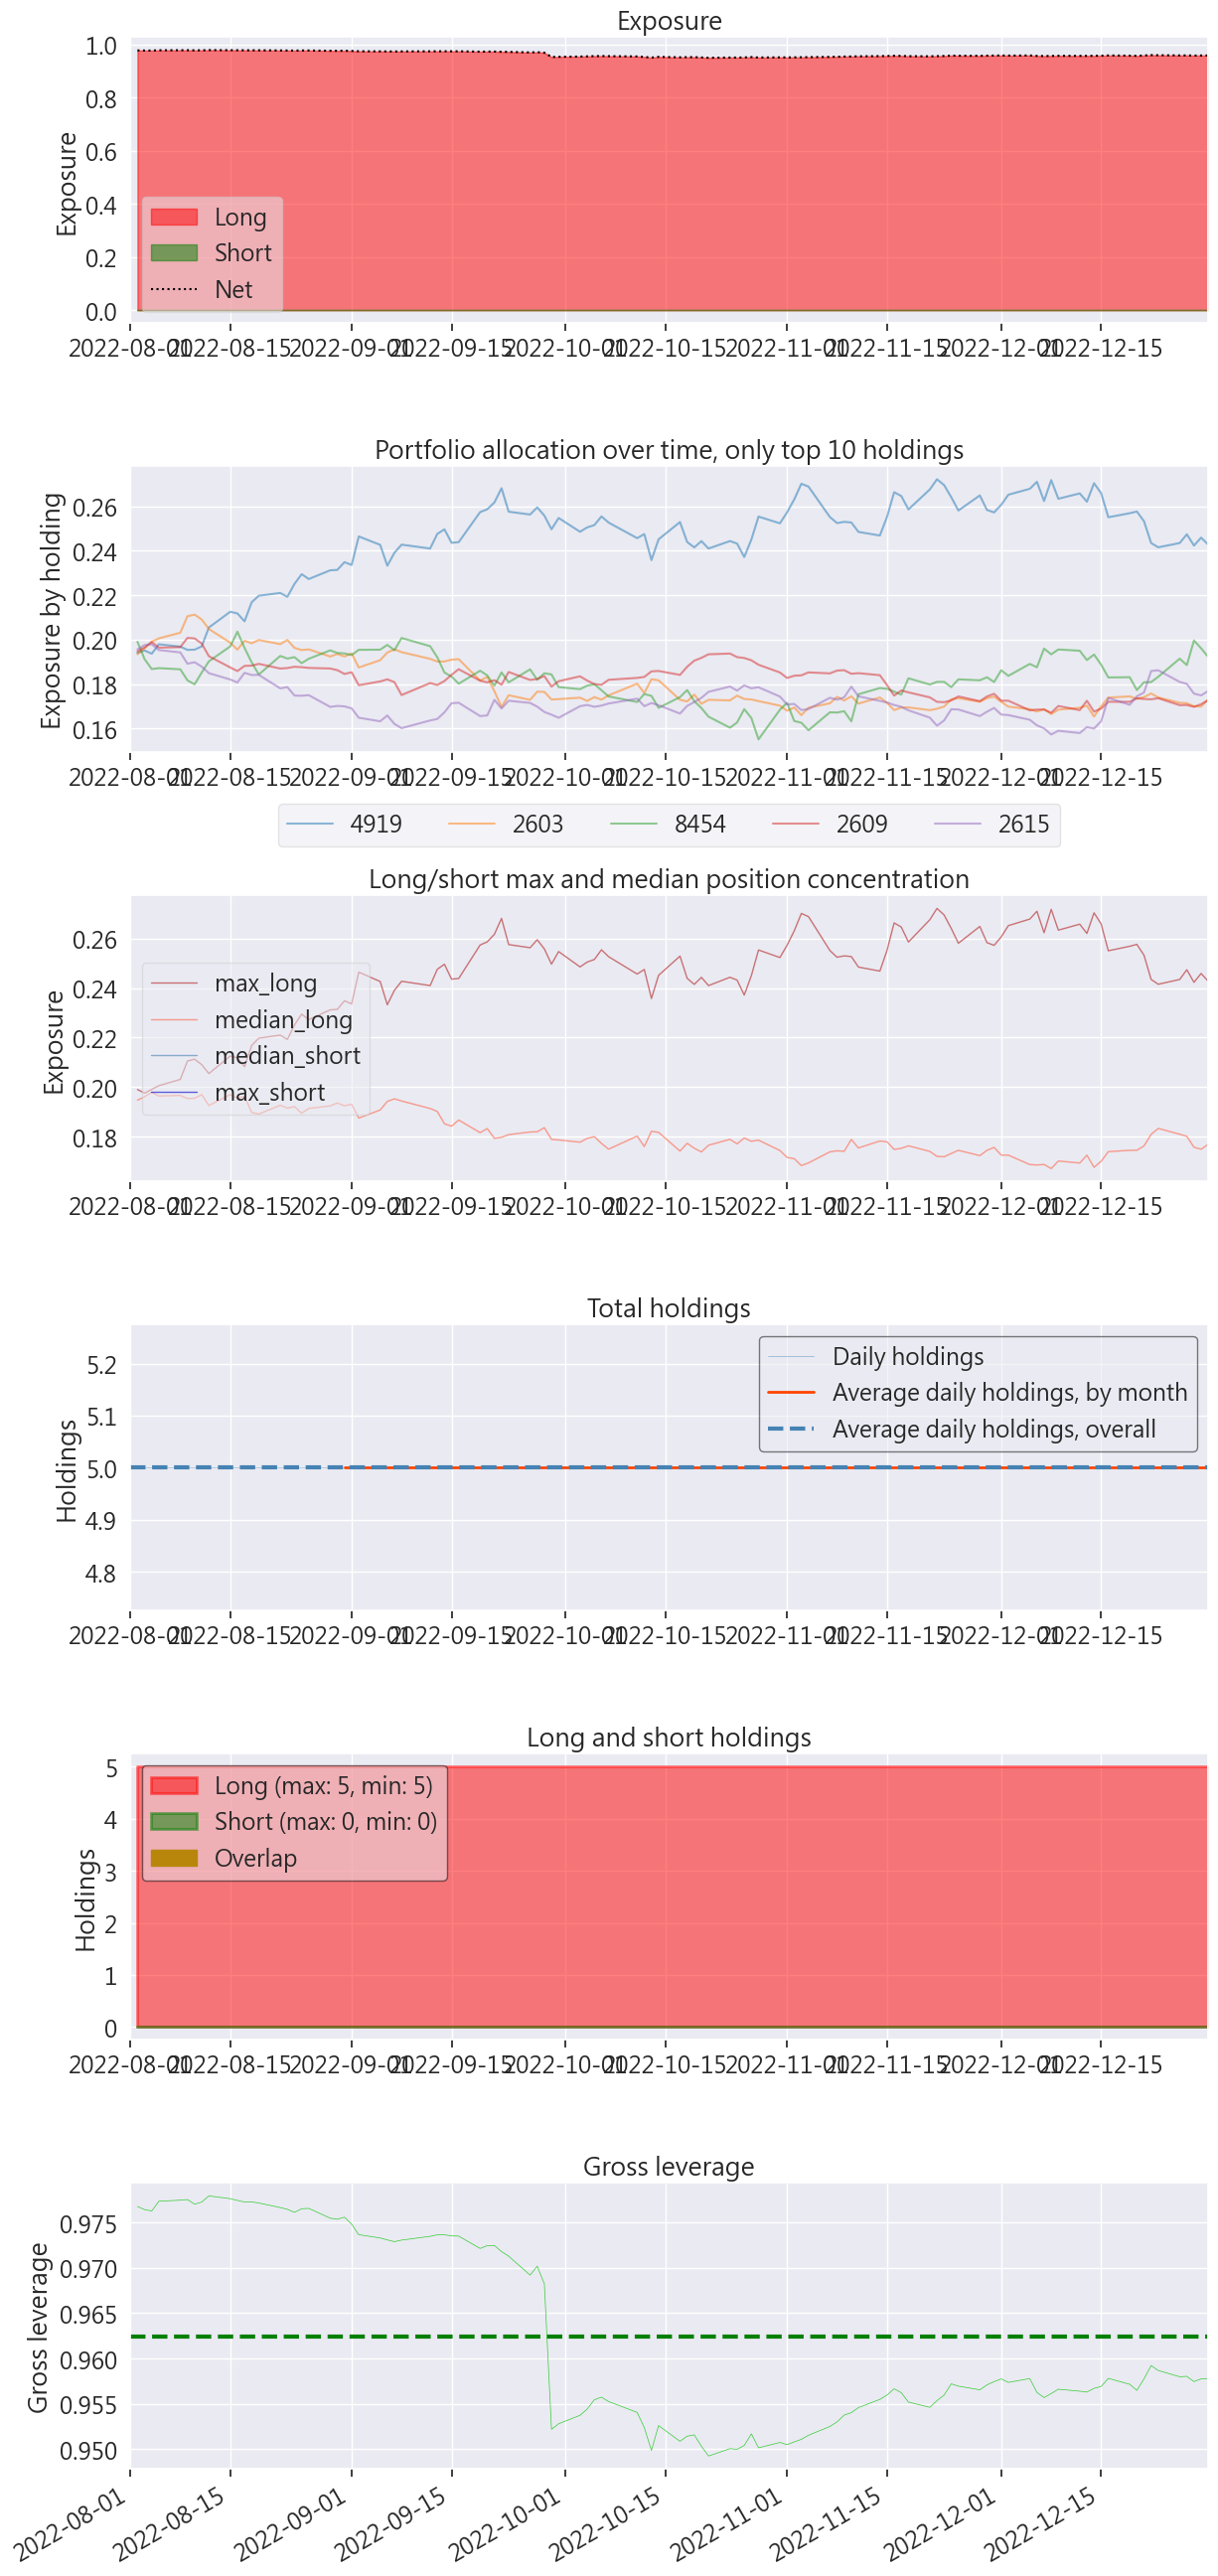

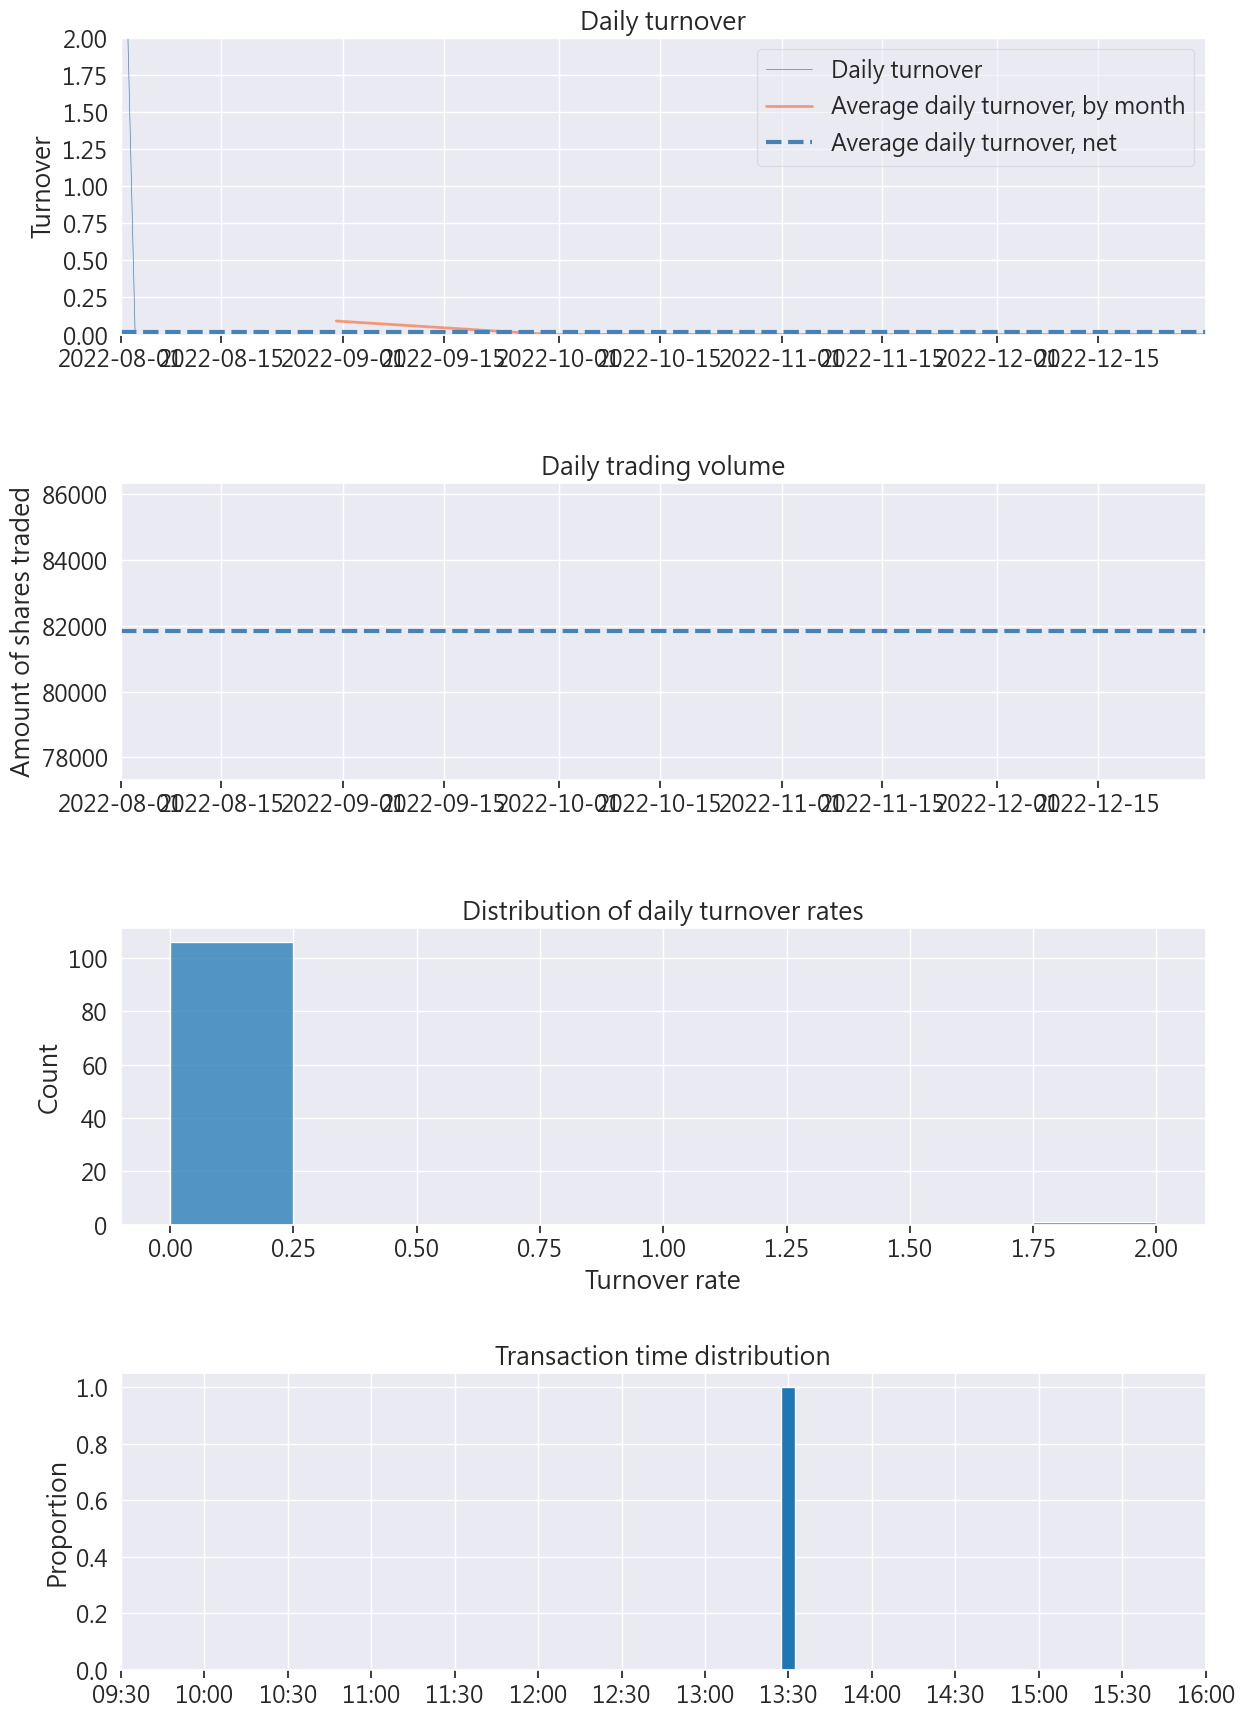

In [33]:
# 繪製 Pyfolio 中提供的所有圖表
pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )